In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
sigmoid = pd.read_csv("Combined_Validation_Predict_Sigmoid.csv")
svr = pd.read_csv("Combined_Validation_Predict_SVR.csv")
gb = pd.read_csv("Combined_Validation_Predict_GB.csv")
ab = pd.read_csv("Combined_Validation_Predict_AB.csv")
stacking = pd.read_csv("Combined_Validation_Predict_Stacking.csv")
stacking2 = pd.read_csv("Combined_Validation_Predict_Stacking_2.csv")

In [3]:
df = pd.concat([sigmoid, svr, gb, ab, stacking, stacking2], axis=1)
df.columns = ['Valid_true', 'Sigmoid_pred', 'SVR_pred','GB_pred','AB_pred','Stacking_pred', 'Stacking_pred_2']

In [4]:
df

,Valid_true,Sigmoid_pred,SVR_pred,GB_pred,AB_pred,Stacking_pred,Stacking_pred_2
0,0.901868,0.960704,1.292965,1.184934,1.342619,1.140361,1.179958
1,1.388567,2.076853,1.023727,1.429653,1.843396,1.336502,1.270487
2,1.620000,2.574833,1.495602,2.067404,2.261323,2.021183,1.864089
3,1.688300,2.351488,1.460957,1.698827,1.999016,1.629546,1.593587
4,2.070000,2.413746,2.167103,1.710792,2.017596,1.640292,1.817253
5,2.078619,2.891423,1.911761,2.280932,2.501662,2.230782,2.141522
6,2.126585,2.227597,1.693703,2.166820,2.199137,2.152822,1.994582
7,2.162925,2.654997,1.951661,2.288623,2.383826,2.263075,2.159107
8,2.230823,2.051476,2.128406,2.282020,2.049333,2.320569,2.208321
9,2.518464,2.351686,2.541920,2.309237,2.218969,2.320095,2.353551


In [5]:
r2_score(df.Valid_true, df.GB_pred)

0.9920774585342907

In [11]:
MAE = pd.DataFrame([mean_absolute_error(df.Valid_true, df.Sigmoid_pred),\
                    mean_absolute_error(df.Valid_true, df.SVR_pred),\
                    mean_absolute_error(df.Valid_true, df.AB_pred),\
                    mean_absolute_error(df.Valid_true, df.GB_pred),\
                   mean_absolute_error(df.Valid_true, df.Stacking_pred_2),\
                   mean_absolute_error(df.Valid_true, df.Stacking_pred)]).transpose()
MAE.columns=['Sigmoid','SVR','AB','GB', 'Stacking_GBSVR', 'Stacking_GBAB']
MAE

,Sigmoid,SVR,AB,GB,Stacking_GBSVR,Stacking_GBAB
0,0.685927,0.382304,0.370409,0.152249,0.176899,0.142676


In [12]:
MedAE = pd.DataFrame([median_absolute_error(df.Valid_true, df.Sigmoid_pred),\
                         median_absolute_error(df.Valid_true, df.SVR_pred),\
                         median_absolute_error(df.Valid_true, df.AB_pred),\
                      median_absolute_error(df.Valid_true, df.GB_pred),\
                     median_absolute_error(df.Valid_true, df.Stacking_pred_2),\
                   median_absolute_error(df.Valid_true, df.Stacking_pred)]).transpose()
MedAE.columns=['Sigmoid','SVR','AB','GB', 'Stacking_GBSVR', 'Stacking_GBAB']
MedAE

,Sigmoid,SVR,AB,GB,Stacking_GBSVR,Stacking_GBAB
0,0.560282,0.35326,0.299496,0.102992,0.157065,0.095353


In [13]:
RMSE = pd.DataFrame([mean_squared_error(df.Valid_true, df.Sigmoid_pred,squared=False),\
                        mean_squared_error(df.Valid_true, df.SVR_pred,squared=False),\
                        mean_squared_error(df.Valid_true, df.AB_pred,squared=False),\
                      mean_squared_error(df.Valid_true, df.GB_pred,squared=False),\
                    mean_squared_error(df.Valid_true, df.Stacking_pred_2,squared=False),\
                   mean_squared_error(df.Valid_true, df.Stacking_pred,squared=False)]).transpose()
RMSE.columns=['Sigmoid','SVR','AB','GB', 'Stacking_GBSVR', 'Stacking_GBAB']
RMSE

,Sigmoid,SVR,AB,GB,Stacking_GBSVR,Stacking_GBAB
0,0.840786,0.463848,0.449847,0.20608,0.220146,0.196308


In [14]:
R2 = pd.DataFrame([r2_score(df.Valid_true, df.Sigmoid_pred),\
                        r2_score(df.Valid_true, df.SVR_pred),\
                        r2_score(df.Valid_true, df.AB_pred),\
                      r2_score(df.Valid_true, df.GB_pred),\
                  r2_score(df.Valid_true, df.Stacking_pred_2),\
                   r2_score(df.Valid_true, df.Stacking_pred)]).transpose()
R2.columns=['Sigmoid','SVR','AB','GB', 'Stacking_GBSVR', 'Stacking_GBAB']
R2

,Sigmoid,SVR,AB,GB,Stacking_GBSVR,Stacking_GBAB
0,0.868125,0.959863,0.962249,0.992077,0.990959,0.992811


In [15]:
metrics_df = pd.concat([MAE,MedAE,RMSE],axis=0).transpose()
metrics_df.columns = ['MAE', 'MedAE', 'RMSE']
metrics_df

,MAE,MedAE,RMSE
Sigmoid,0.685927,0.560282,0.840786
SVR,0.382304,0.353260,0.463848
AB,0.370409,0.299496,0.449847
GB,0.152249,0.102992,0.206080
Stacking_GBSVR,0.176899,0.157065,0.220146
Stacking_GBAB,0.142676,0.095353,0.196308


In [16]:
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('serif')
font.set_name('Arial')
# font.set_style('italic')
font.set_size('14')
# font.set_weight('bold')

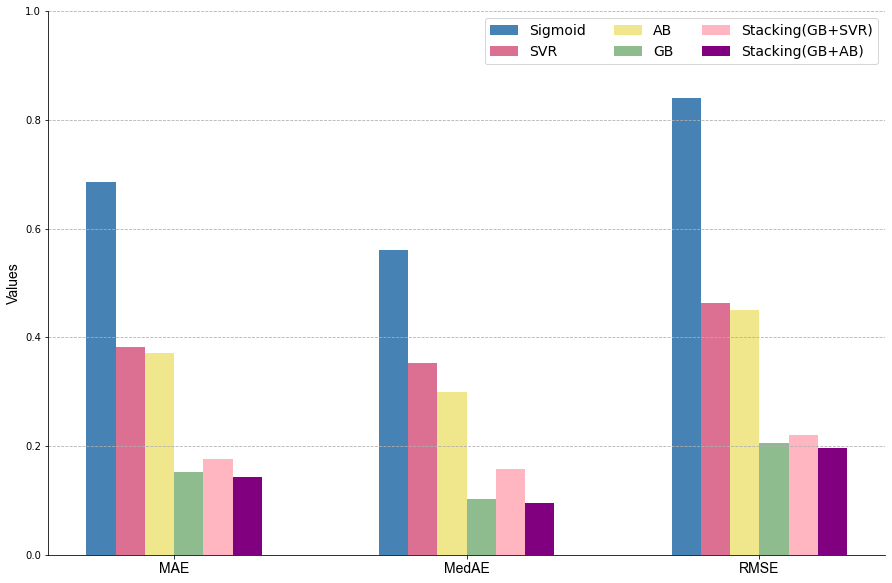

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
fig.patch.set_facecolor('white')
ax.grid(True, which='both', axis='y',linestyle='--')
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# ax.bar(R2_df.columns, R2_df.iloc[0,:], width=0.3)

width=0.1
x = np.arange(3)
rects1 = ax.bar(x-5*width/2, metrics_df.iloc[0,:], width,color='steelblue', label='Sigmoid')
rects2 = ax.bar(x-3*width/2, metrics_df.iloc[1,:], width, color='palevioletred', label='SVR')
rects3 = ax.bar(x-width/2, metrics_df.iloc[2,:], width, color='khaki', label='AB')
rects4 = ax.bar(x+width/2, metrics_df.iloc[3,:], width, color='darkseagreen', label='GB')
rects5 = ax.bar(x+3*width/2, metrics_df.iloc[4,:], width, color='lightpink', label='Stacking(GB+SVR)')
rects6 = ax.bar(x+5*width/2, metrics_df.iloc[5,:], width, color='purple', label='Stacking(GB+AB)')

ax.set_ylim(0,1)

ax.set_ylabel('Values', fontproperties=font)
ax.set_xticks(x)
ax.set_xticklabels(metrics_df.columns, fontproperties=font)
ax.legend(fontsize=14, ncol=3)

# fig.suptitle("Model performance on combined validation set", y=0.95, fontsize=16, fontweight='bold')

# fig.savefig("/Users/yanyan/Desktop/RT_Model_fig/COM_model_performance_validation.png", dpi=300, bbox_inches='tight')

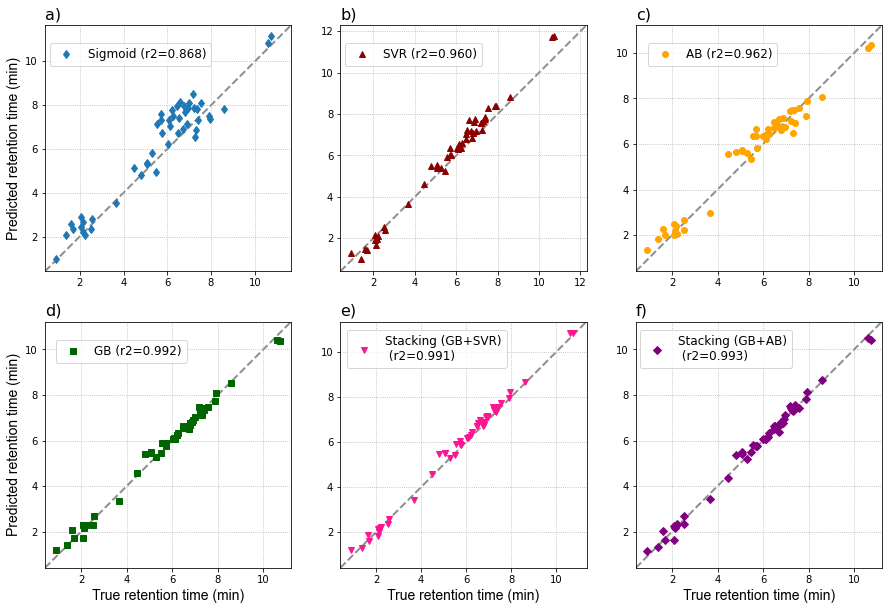

In [27]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))
fig.patch.set_facecolor('white')
ax1.grid(True, which='major', linestyle=':')
ax2.grid(True, which='major', linestyle=':')
ax3.grid(True, which='major', linestyle=':')
ax4.grid(True, which='major', linestyle=':')
ax5.grid(True, which='major', linestyle=':')
ax6.grid(True, which='major', linestyle=':')

ax1.plot(df.Valid_true, df.Sigmoid_pred, 'd', label='Sigmoid (r2=%.3f)' % r2_score(df.Valid_true, df.Sigmoid_pred))
ax2.plot(df.Valid_true, df.SVR_pred, '^', color='darkred', label='SVR (r2=%.3f)' % r2_score(df.Valid_true, df.SVR_pred))
ax3.plot(df.Valid_true, df.AB_pred, 'o', color='orange', label='AB (r2=%.3f)' % r2_score(df.Valid_true, df.AB_pred))
ax4.plot(df.Valid_true, df.GB_pred, 's', color='darkgreen', label='GB (r2=%.3f)' % r2_score(df.Valid_true, df.GB_pred))
ax1.legend(bbox_to_anchor=(0.7, 0.95), fontsize='large')
ax2.legend(bbox_to_anchor=(0.6, 0.95), fontsize='large')
ax3.legend(bbox_to_anchor=(0.6, 0.95), fontsize='large')
ax4.legend(bbox_to_anchor=(0.6, 0.95), fontsize='large')

ax5.plot(df.Valid_true, df.Stacking_pred_2, 'v', color='deeppink', label='Stacking (GB+SVR)\n (r2=%.3f)' % r2_score(df.Valid_true, df.Stacking_pred_2))
ax6.plot(df.Valid_true, df.Stacking_pred, 'D', color='purple', label='Stacking (GB+AB)\n (r2=%.3f)' % r2_score(df.Valid_true, df.Stacking_pred))
# ax3.plot(df.Valid_true, df.Stacking_pred, 'v', color='purple', label='Stacking (r2=%.3f)' % r2_score(df.Valid_true, df.Stacking_pred))

ax5.legend(bbox_to_anchor=(0.7, 0.99), fontsize='large')
ax6.legend(bbox_to_anchor=(0.66, 0.99), fontsize='large')

def plot_y_true(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k--', color='dimgrey', linewidth=2, alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return

plot_y_true(ax1)
plot_y_true(ax2)
plot_y_true(ax3)
plot_y_true(ax4)
plot_y_true(ax5)
plot_y_true(ax6)

ax6.set_xlabel("True retention time (min)", fontproperties=font)
ax5.set_xlabel("True retention time (min)", fontproperties=font)
ax4.set_xlabel("True retention time (min)", fontproperties=font)
ax1.set_ylabel("Predicted retention time (min)", fontproperties=font)
ax4.set_ylabel("Predicted retention time (min)", fontproperties=font)

ax1.set_title('a)', loc='left', fontsize=16)
ax2.set_title('b)', loc='left', fontsize=16)
ax3.set_title('c)', loc='left', fontsize=16)
ax4.set_title('d)', loc='left', fontsize=16)
ax5.set_title('e)', loc='left', fontsize=16)
ax6.set_title('f)', loc='left', fontsize=16)


# fig.savefig("/Users/yanyan/Desktop/RT_Model_fig/COM_Basic_pred_true.png", dpi=300, bbox_inches='tight')
